In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
callbacks = myCallback()

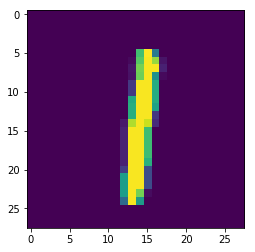

In [6]:
plt.imshow(x_train[40])

In [7]:
plt.show()

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1987 - acc: 0.9411
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0791 - acc: 0.9758
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0529 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0366 - acc: 0.9885
Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0277 - acc: 0.9907
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0277 - acc: 0.9907
